<a href="https://colab.research.google.com/github/jyotika2/Data-Mining-Project/blob/master/FinalProject_DataMining_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import string
import nltk
import types
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
import copy

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import tensorflow as tf 
tf.test.gpu_device_name() 

''

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [5]:
link = 'https://drive.google.com/open?id=13ob0u_ljytanjFWzdjjb3lwL5L8OGEqm'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

13ob0u_ljytanjFWzdjjb3lwL5L8OGEqm


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 

In [0]:
# dataset = pd.read_csv('C:/Users/gaura/Downloads/train.csv')
# test_dataset = pd.read_csv('C:/Users/gaura/Downloads/test.csv')
import io
dataset = pd.read_csv('train.csv')

In [8]:
dataset

,user,sku,category,query,click_time,query_time
0,000000df17cd56a5df4a94074e133c9d4739fae3,2125233,abcat0101001,Televisiones Panasonic 50 pulgadas,2011-09-01 23:44:52.533,2011-09-01 23:43:59.752
1,000001928162247ffaf63185cd8b2a244c78e7c6,2009324,abcat0101001,Sharp,2011-09-05 12:25:37.42,2011-09-05 12:25:01.187
2,000017f79c2b5da56721f22f9fdd726b13daf8e8,1517163,pcmcat193100050014,nook,2011-08-24 12:56:58.91,2011-08-24 12:55:13.012
3,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877125,abcat0101001,rca,2011-10-25 07:18:14.722,2011-10-25 07:16:51.759
4,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877134,abcat0101005,rca,2011-10-25 07:19:51.697,2011-10-25 07:16:51.759
...,...,...,...,...,...,...
1865264,ffffbcfcee8ff636231fa0df557528e6fa2ecdba,3674224,pcmcat247400050000,ttv,2011-10-28 07:30:33.921,2011-10-28 07:27:05.039
1865265,ffffddbbdc67c4d775c7232082adaf40c7e7d03c,2986037,pcmcat218000050000,incase,2011-09-11 14:18:12.625,2011-09-11 14:17:57.759
1865266,ffffed824a4fc5b78e407a423f72bbbc2f6e5213,3303069,pcmcat248500050020,ds games,2011-10-20 00:24:18.609,2011-10-20 00:23:16.705
1865267,fffff158dec2f40d082f7797413f7b6dbc1713e6,2390524,pcmcat209000050008,Archos,2011-10-30 15:42:02.347,2011-10-30 15:40:20.889


In [0]:
temp = dataset.groupby(['sku'])['sku'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(100)

In [43]:
temp.sku.values

array([2842056, 1945531, 2842092, 9755322, 9225377, 2620821, 3061302,
       2550164, 2390524, 2817582, 9492426, 3247045, 1331156, 9836718,
       2138389, 9225411, 2893174, 2969477, 3209231, 1945595, 2738738,
       2339322, 2475916, 1623912, 1257136, 2658077, 2989098, 1222817,
       2873059, 9420361, 2809771, 1853531, 1232474, 2225047, 3487648,
       9172799, 2836657, 1535836, 2970255, 3108109, 8229044, 3143987,
       3303069, 2173056, 9744971, 2925714, 9755395, 1251336, 1162184,
       9809492, 3103247, 3487784, 2506173, 1980124, 1534115, 3232178,
       2506119, 1208844, 1831054, 1230537, 2971078, 2224084, 1946197,
       3061366, 3168067, 1303056, 2845071, 1069212, 2300417, 2775225,
       3674224, 2539739, 2803428, 3005219, 8915178, 2817743, 2049039,
       2204211, 2512059, 1308088, 1517163, 8208389, 9945474, 2414049,
       2265381, 1685061, 8856865, 8998506, 2769576, 6889584, 1987075,
       1251981, 9845581, 1049236, 2375201, 3122039, 9947181, 1161725,
       3133099, 8913

In [0]:
# new_dataset = copy.deepcopy(dataset)
new_dataset = dataset[dataset.sku.isin(temp.sku.values)]

In [45]:
new_dataset

,user,sku,category,query,click_time,query_time
2,000017f79c2b5da56721f22f9fdd726b13daf8e8,1517163,pcmcat193100050014,nook,2011-08-24 12:56:58.91,2011-08-24 12:55:13.012
11,00006d8bb4bcc66f1676237629968277fb7a8dc5,1230537,pcmcat201900050009,Zagg iPhone,2011-10-18 17:21:33.919,2011-10-18 17:21:26.57
12,00007557d9b11f2f1a99792317963d30174171ba,3168067,cat02713,Watch The Throne,2011-09-04 10:55:20.427,2011-09-04 10:55:10.874
26,000126150c17acb66664a42c47d5dba399311783,9755322,pcmcat247400050001,Macbook,2011-09-26 15:12:48.533,2011-09-26 15:12:33.537
40,00017f7beeac02736c0ce7bf1e75f3010939b34e,1831054,abcat0101001,lcd tv,2011-09-28 07:26:32.153,2011-09-28 07:26:21.476
...,...,...,...,...,...,...
1865252,fffedfb154fbc4107ba7b075e4e1772a5a0cb20b,9836718,pcmcat144700050004,dre beats,2011-10-14 10:18:28.801,2011-10-14 10:17:52.387
1865262,ffff8667019e63064898cb1c6562610667009848,3232178,cat02012,tha carter IV,2011-08-31 17:04:29.647,2011-08-31 17:04:15.591
1865264,ffffbcfcee8ff636231fa0df557528e6fa2ecdba,3674224,pcmcat247400050000,ttv,2011-10-28 07:30:33.921,2011-10-28 07:27:05.039
1865266,ffffed824a4fc5b78e407a423f72bbbc2f6e5213,3303069,pcmcat248500050020,ds games,2011-10-20 00:24:18.609,2011-10-20 00:23:16.705


In [62]:
# number of unique users in the dataset
len(new_dataset['user'].unique())

275718

In [0]:
# Extract required rows to apply Naive Bayes
subset_dataset = new_dataset[['query', 'sku']]

In [0]:
# dataset_to_train = subset_dataset.sample(20000)
# naive_bayes_dataset = copy.deepcopy(dataset_to_train)
naive_bayes_dataset = copy.deepcopy(subset_dataset)
# naive_bayes_dataset = naive_bayes_dataset.sample(100000)
classes = naive_bayes_dataset['sku'].unique()

In [0]:
naive_bayes_dataset['query'] = naive_bayes_dataset['query'].astype('str')

In [0]:
# convert all characters in query column to lower case
naive_bayes_dataset.loc[:,['query']] = naive_bayes_dataset['query'].map(lambda x: x.lower() if isinstance(x, str) else x)

In [0]:
# remove punctuation
naive_bayes_dataset['query'] = naive_bayes_dataset['query'].str.translate(str.maketrans(' ', ' ', string.punctuation.replace('.', '')))

In [0]:
# word tokenizer
naive_bayes_dataset['query'] = naive_bayes_dataset['query'].apply(nltk.word_tokenize)

In [0]:
stemmer = PorterStemmer()
 
naive_bayes_dataset['query'] = naive_bayes_dataset['query'].apply(lambda x: [stemmer.stem(y) for y in x])

In [0]:
# This converts the list of words into space-separated strings
naive_bayes_dataset['query'] = naive_bayes_dataset['query'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(naive_bayes_dataset['query'])

In [0]:
transformer = TfidfTransformer().fit(counts)

counts = transformer.transform(counts)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(counts, naive_bayes_dataset['sku'], test_size=0.1, random_state=69)

In [0]:
model = MultinomialNB().partial_fit(X_train, y_train, classes)

In [57]:


predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.5646608171817705


In [25]:
print(confusion_matrix(y_test, predicted))

[[  9 130   0 ...   0   0   0]
 [  2 173   0 ...   0   0   0]
 [  0   0  73 ...   0   0   0]
 ...
 [  0   1   0 ...   0   0   0]
 [  0   0   0 ...   0 207   0]
 [  0   0   0 ...   0   0 355]]


In [63]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predicted))

0.5646608171817705


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

     1049236       0.42      0.04      0.07       138
     1069212       0.75      0.08      0.15       182
     1161725       0.95      0.70      0.80       141
     1162184       0.38      0.92      0.54       217
     1208844       0.61      0.30      0.40       196
     1222817       0.56      0.82      0.67       283
     1230537       0.74      0.40      0.52       183
     1232474       0.88      0.11      0.19       276
     1251336       0.91      0.28      0.43       223
     1251981       0.61      0.60      0.61       161
     1257136       0.86      0.75      0.80       295
     1303056       0.92      0.84      0.88       181
     1308088       0.65      0.67      0.66       166
     1331156       0.69      0.62      0.66       436
     1517163       0.82      0.80      0.81       144
     1534115       0.50      0.00      0.01       226
     1535836       0.43      0.01      0.03       228
     1623912       0.63    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.preprocessing import LabelBinarizer
# y_test_binarize = label_binarize(y_test, classes)
lb = LabelBinarizer()
lb.fit(y_test)

y_test = lb.transform(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


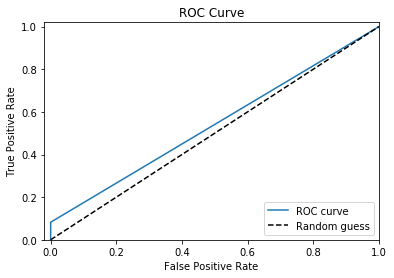

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

# y_pred_prob = model.predict_proba(X_test)[:,1]
# print(type(y_pred_prob))
# y_pred_prob_binarize = label_binarize(y_pred_prob, classes)
pred = lb.transform(predicted)
print(pred)
fpr, tpr, thresholds = roc_curve(y_test[:,1], pred[:,1])

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [102]:
roc_auc_score(y_test, pred)

0.7440319367620123

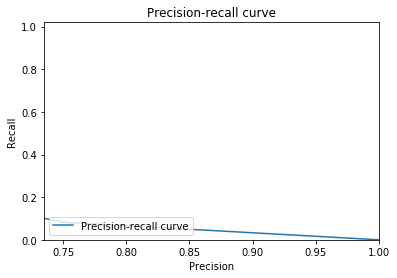

In [104]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test[:,1], pred[:,1])

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

In [105]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, pred)

0.35550585878087704

In [0]:
ngrams_dataset = copy.deepcopy(subset_dataset)

In [27]:
ngrams_dataset['query'] = ngrams_dataset['query'].astype('str')
ngrams_dataset['query']

11              Zagg iPhone
12         Watch The Throne
26                  Macbook
40                   lcd tv
46                   lcd tv
                 ...       
1865252           dre beats
1865262       tha carter IV
1865264                 ttv
1865266            ds games
1865267              Archos
Name: query, Length: 265886, dtype: object

In [0]:
# convert all characters in query column to lower case
ngrams_dataset.loc[:,['query']] = ngrams_dataset['query'].map(lambda x: x.lower() if isinstance(x, str) else x)

In [0]:
# remove punctuation
ngrams_dataset['query'] = ngrams_dataset['query'].str.translate(str.maketrans(' ', ' ', string.punctuation.replace('.', '')))

In [0]:
# word tokenizer
ngrams_dataset['query'] = ngrams_dataset['query'].apply(nltk.word_tokenize)

In [0]:
# removing stop words
stop = stopwords.words('english')
ngrams_dataset['query'] = ngrams_dataset['query'].apply(lambda x: [item for item in x if item not in stop])    

In [0]:
ngrams_dataset['query'] = ngrams_dataset['query'].apply(lambda x: ' '.join(x))

In [0]:
ngrams_dataset['query'] = ngrams_dataset['query'].apply(lambda x: ' '.join(sorted(x.split())))

In [0]:
new_query_list = ngrams_dataset['query'].apply(lambda x: nltk.bigrams(x.split()) if len(x.split())>1 else [x])

In [0]:
new_query_list = new_query_list.apply(lambda x: [' '.join(y) for y in x if isinstance(x, types.GeneratorType)] if isinstance(x, types.GeneratorType) else x)

In [0]:
ngrams_dataset['query'] = new_query_list

In [0]:
# This converts the list of words into space-separated strings
ngrams_dataset['query'] = ngrams_dataset['query'].apply(lambda x: ' '.join(x))

count_vect_2 = CountVectorizer()
counts_2 = count_vect.fit_transform(ngrams_dataset['query'])

In [0]:
transformer_2 = TfidfTransformer().fit(counts_2)

counts = transformer_2.transform(counts_2)

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(counts_2, ngrams_dataset['sku'], test_size=0.1, random_state=69)

In [0]:
model_2 = MultinomialNB().fit(X_train_2, y_train_2)

In [41]:
predicted_2 = model_2.predict(X_test_2)

print(np.mean(predicted_2 == y_test_2))

0.5847154838467036
